<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [174]:
# Import Required Libariries
import pandas as pd
from collections import Counter
from tqdm import tqdm
tqdm.pandas()
import count

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import re
from nltk.stem import PorterStemmer
import spacy
from spacy.tokenizer import Tokenizer


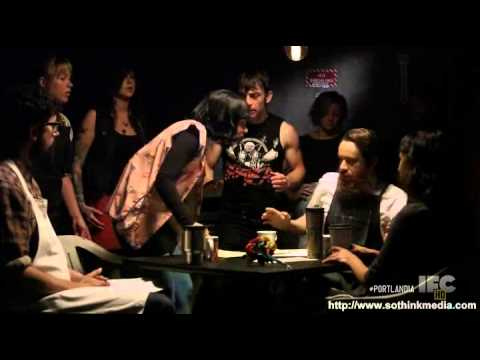

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [4]:
%pwd
#the pwd command writes the full pathname of the current working directory to the standard output.

'Z:\\DataScience\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [5]:
url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [237]:
def keep_alpha(text):
    "keep lower case letters"
    text = re.sub('[^a-z]',' ',text)
    return text

In [253]:
" ".join("hello    jose \t\n  Urena".split(None))

'hello jose Urena'

In [257]:
#Make all text lower case, strip white leading and trailing spaces & removes date at beginning of the text. 
shops['wrangled_review'] = shops['full_review_text'].apply(lambda x: keep_alpha(x.lower().split(None,1)[1]).strip())

In [259]:
shops['wrangled_review'] = shops['wrangled_review'].apply(lambda x: " ".join(x.split()))
#to get rid of extra spaces created by the regular expression keep_alpha

In [154]:
pd.set_option('display.max_colwidth', 300)

In [260]:
sample_review = shops['wrangled_review'][0]
print(sample_review)

check in love love loved the atmosphere every corner of the coffee shop had its own style and there were swings i ordered the matcha latte and it was muy fantastico ordering and getting my drink were pretty streamlined i ordered on an ipad which included all beverage selections that ranged from coffee to wine desired level of sweetness and a checkout system i got my latte within minutes i was hoping for a typical heart or feather on my latte but found myself listing out all the possibilities of what the art may be any ideas


In [148]:
nlp = spacy.load("en_core_web_md")

In [157]:
shops[['wrangled_review', 'full_review_text']].head(5)

,wrangled_review,full_review_text
0,checkin love love loved the atmosphere every corner of the coffee shop had its own style and there were swings i ordered the matcha latte and it was muy fantastico ordering and getting my drink were pretty streamlined i ordered on an ipad which included all beverage selections that ranged from c...,"11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selec..."
1,listed in date night austin ambiance in austin beautiful love the ambiance instagramworthy definitely so be prepared this is gonna cost you a pretty penny waffle dessert was just decentnothing to rave about but will probably be back just to be somewhere unique and nice,"12/2/2016 Listed in Date Night: Austin, Ambiance in Austin BEAUTIFUL!!!! Love the ambiance! Instagram-worthy!!! Definitely $$$, so be prepared. This is gonna cost you a pretty penny :) Waffle dessert was just decent...nothing to rave about. But, will probably be back just to be somewhere uniq..."
2,checkin listed in brunch spots i loved the eclectic and homey plush decor and who doesnt want to swing and drink their coffee i would categorize this as a pricier coffee place but to me it was worth it after thanksgiving nobody wants to make brunch so we headed out in search of chicken and waf...,"11/30/2016 1 check-in Listed in Brunch Spots I loved the eclectic and homey plush decor and who doesn't want to swing and drink their coffee? I would categorize this as a pricier coffee place but, to me it was worth it. After Thanksgiving nobody wants to make brunch so we headed out in search..."
3,very cool decor good drinks nice seating however just about everything is overpriced extra for ounces of almond milk in a cortado no wifi music is a bit loud and the mix is odd pleasant french oldies followed by loud techno several tables were dirty when we got there service is average it ...,11/25/2016 Very cool decor! Good drinks Nice seating However... Just about everything is overpriced. $1.50 extra for 3 ounces of Almond Milk in a cortado. No WiFi Music is a bit loud and the mix is odd. Pleasant French oldies followed by loud techno. Several tables were dirty when we got the...
4,checkin they are located within the northcross mall shopping center facing east toward burnet rd with plenty of parking i loved their computerized user friendly ordering system it made it easy me to pick choose all the items i wanted to try i ordered pop tart chicken waffles strawberry waffles...,"12/3/2016 1 check-in They are located within the Northcross mall shopping center facing east toward Burnet Rd with plenty of parking. I loved their computerized user friendly ordering system, it made it easy me to pick & choose all the items I wanted to try. I ordered pop tart, chicken & waffle..."


In [263]:
shops['wrangled_review'].isnull().sum()

0

In [264]:
print(nlp)

In [265]:
tokenizer = Tokenizer(nlp.vocab)

In [353]:
STOP_WORDS = nlp.Defaults.stop_words.union(["check-in","checkin", "coffee","place","work","drink"])

In [354]:
tokens = []
#tokens is the list of words return by for-loop tokenzied and no stop words words = token
for review in tokenizer.pipe(shops['wrangled_review'], batch_size=500):
    doc_tokens = [word.lemma_ for word in review if 
                  ((word.text not in STOP_WORDS) and (len(word.text)>2))]
    tokens.append(doc_tokens)

shops['tokenized_review'] = tokens

In [356]:
shops['tokenized_review'].head(3)

0    [check, love, love, love, atmosphere, corner, shop, style, swing, order, matcha, latte, muy, fantastico, order, get, pretty, streamline, order, ipad, include, beverage, selection, range, wine, desire, level, sweetness, checkout, system, get, latte, minute, hope, typical, heart, feather, latte, f...
1                                                                                                            [list, date, night, austin, ambiance, austin, beautiful, love, ambiance, instagram, worthy, definitely, prepare, gonna, cost, pretty, penny, waffle, dessert, decent, rave, probably, unique, nice]
2    [check, list, brunch, spot, love, eclectic, homey, plush, decor, doesn, want, swing, categorize, pricey, worth, thanksgiving, want, brunch, head, search, chicken, waffle, ample, park, private, lot, order, pad, pick, seat, item, ready, patient, drink, long, cold, brew, chicken, waffle, share, pop...
Name: tokenized_review, dtype: object

In [357]:
len(shops['wrangled_review'][0])

529

In [358]:
len(shops['tokenized_review'][0])

43

In [359]:
len(shops['lemmas_review'][0])

44

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [318]:
def count(docs):
    '''This function takes a list of tokenized documents as input and returns
    a dataframe with frequency counts and rank for each token.
    
    # Arguments
        docs: list, tokenized list of documents
        
    # Returns
        wc: dataframe, 
    '''
    
    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [361]:
wc = count(shops['tokenized_review'])
print(wc.shape)
display(wc.head(20))
display(wc.tail(20))

(12322, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
132,good,2893,4187,1.0,0.012524,0.012524,0.379858
102,great,2862,3966,2.0,0.011863,0.024386,0.375788
2,check,3175,3469,3.0,0.010376,0.034762,0.416886
134,like,2286,3403,4.0,0.010179,0.044941,0.300158
391,come,1935,2642,5.0,0.007902,0.052843,0.254070
451,time,1775,2407,6.0,0.007200,0.060043,0.233062
26,love,1826,2394,7.0,0.007161,0.067203,0.239758
47,austin,1843,2347,8.0,0.007020,0.074224,0.241991
25,shop,1702,2299,9.0,0.006876,0.081100,0.223477
4,order,1477,2196,10.0,0.006568,0.087668,0.193934


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
12297,balsalmic,1,1,12303.0,0.000003,0.999943,0.000131
12300,beast,1,1,12304.0,0.000003,0.999946,0.000131
12302,ridick,1,1,12305.0,0.000003,0.999949,0.000131
12304,whited,1,1,12306.0,0.000003,0.999952,0.000131
12299,divorce,1,1,12307.0,0.000003,0.999955,0.000131
12301,whatnots,1,1,12308.0,0.000003,0.999958,0.000131
12303,buuuuuut,1,1,12309.0,0.000003,0.999961,0.000131
12305,holla,1,1,12310.0,0.000003,0.999964,0.000131
12308,shelby,1,1,12311.0,0.000003,0.999967,0.000131
12312,foodwise,1,1,12312.0,0.000003,0.999970,0.000131


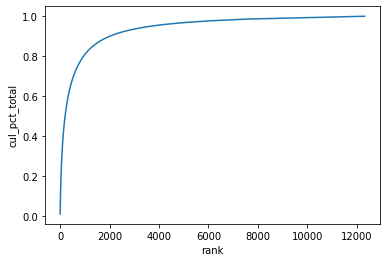

In [320]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

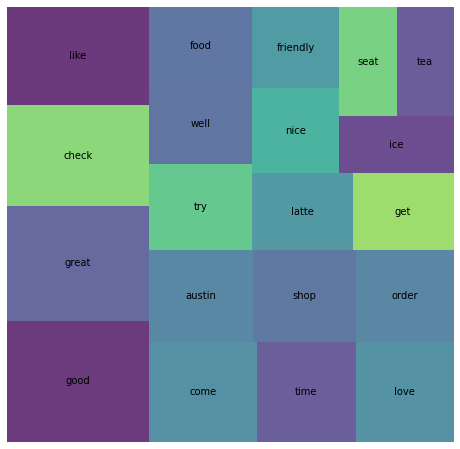

In [362]:
wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [366]:
good = shops[shops['star_rating'].isin([" 5.0 star rating "," 4.0 star rating "])]
bad = shops[shops['star_rating'].isin([" 2.0 star rating "," 1.0 star rating "])]

In [367]:
shops['star_rating'].head(5)

0     5.0 star rating 
1     4.0 star rating 
2     4.0 star rating 
3     2.0 star rating 
4     4.0 star rating 
Name: star_rating, dtype: object

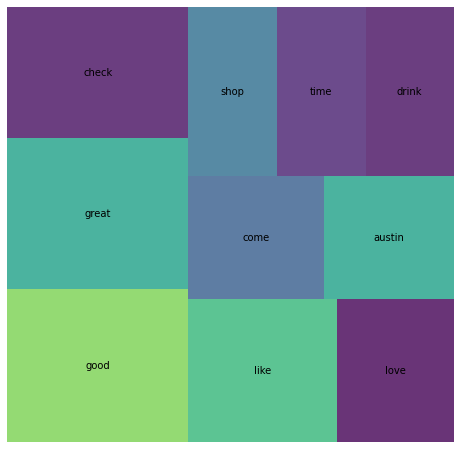

In [351]:
wc = count(good['tokenized_review'])
wc_top20 = wc[wc['rank'] <= 10]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

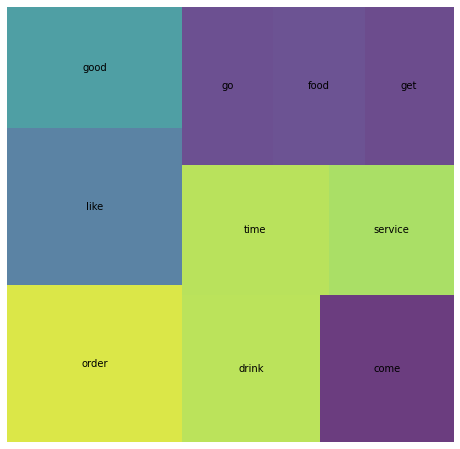

In [352]:
wc = count(bad['tokenized_review'])
wc_top20 = wc[wc['rank'] <= 10]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

